<a href="https://colab.research.google.com/github/otopiachka/markdown-doc/blob/master/Homework_2_Sorokin_Andrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

**Загружаем библиотеки**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

**Cчитываем в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки данного Homework_2. Для таблицы transactions используйте только первые n=1000000 строк.**

In [3]:
### Type your code here
tr_mcc_codes = pd.read_csv(filepath_or_buffer = 'tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv(filepath_or_buffer = 'tr_types.csv', sep=';')
transactions = pd.read_csv(filepath_or_buffer = 'transactions.csv', nrows=1000000)
gender_train = pd.read_csv(filepath_or_buffer = 'gender_train.csv')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

**Соединяем transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train).**

In [4]:
### Type your code here
transactions = transactions.merge(gender_train, how='left')
transactions = transactions.merge(tr_mcc_codes)
transactions = transactions.merge(tr_types)
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


**Данный код запускает удаление таблиц gender_train, tr_types, tr_mcc_codes, но лучше этого не делать -я их использую дальше в работе** 😊

In [ ]:
del gender_train, tr_mcc_codes, tr_types

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

**Отсекаем транзакции больше нуля**

In [5]:
tr_spend = transactions[transactions.amount <0]

**Берем транзакции по столбцу gender тип 1**

In [6]:
tr_spend_1 = tr_spend[tr_spend.gender == 1] 

**Берем транзакции по столбцу gender тип 0**

In [7]:
tr_spend_0 = tr_spend[tr_spend.gender == 0] 

**Определяем модуль разницы между средними тратами gender=1 & gender=0. Округляем до 2-х знаков после запятой и записываем результат в переменную delta**

In [8]:
delta = round(abs((tr_spend_1.amount.mean() - tr_spend_0.amount.mean())),2) 

In [9]:
delta

32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

**Создаем новый столбец - mcc_code+tr_type, объединив столбцы mcc_code и tr_type и приводим новый столбец к типу данных string (строка)**

In [10]:
transactions['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)

**Отсекаем amount больше 0, делаем сводную таблицу по mcc_code+tr_type, высчитываем дисперсию по amount, оставляем наблюдения >=10 и удаляем недостающие значения. Результат записываем в res**

In [11]:
res = (transactions.query('amount < 0').groupby('mcc_code+tr_type')['amount'].agg(lambda x: x.var()**2 if len(x)>=10 else np.nan).dropna())

**Определяем отношение максимальной дисперсии к минимальной, полученное значение округляем до целого числа**

In [12]:
ratio = round(res.max() / res.min())

In [13]:
ratio

84099886070340

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте<br>	
    - 5) Плата за получение наличных в АТМ. Россия
    - 6) Наличные. Зарубеж. банк
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

**Отсекаем транзакции меньше нуля**

In [14]:
tr_max_income = transactions[transactions.amount >0]

**Берем транзакции по столбцу gender тип 1**

In [15]:
max_income_1 = tr_max_income[tr_max_income.gender == 1] 

**Берем транзакции по столбцу gender тип 0**

In [16]:
max_income_0 = tr_max_income[tr_max_income.gender == 0]

**Делаем сводную таблицу gender = 1 по столбцу tr_type с максимальными значениями amount и берем пять нижних значений**

In [17]:
max_income_1 = max_income_1.groupby('tr_type')[['amount']].max().tail()

**Делаем массив top_list_1 из индексов tr_type**

In [18]:
top_list_1 = max_income_1.index.values

**Для gender 0, все тоже самое как и для gender=1**

In [19]:
max_income_0 = max_income_0.groupby('tr_type')[['amount']].max().tail()
top_list_0 = max_income_0.index.values

**Тут объеденяем две таблицы gender 1 & 0 по пересечениям, по идее должна получиться таблица с ответами**

In [20]:
max_income = tr_types[tr_types.tr_type.isin(top_list_1)].merge(tr_types[tr_types.tr_type.isin(top_list_0)])

In [21]:
max_income

,tr_type,tr_description
0,7070,Перевод на карту (с карты) через Мобильный бан...
1,7071,Перевод на карту (с карты) через Мобильный бан...
2,7074,Перевод с карты на карту в овердрафте через Мо...
3,7075,Перевод с карты на карту в овердрафте через Мо...


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

**Тут у меня не очень получилсь** 🤷‍♂️

In [22]:
transactions[['tr_day','tr_time']] = transactions.tr_datetime.str.split(expand=True)

In [23]:
tr_mcc = transactions[transactions.groupby('tr_day')['mcc_code'].transform('nunique')>75]

In [24]:
tr_mcc = tr_mcc[transactions.amount < 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
tr_mcc['mcc_description'].value_counts()

Финансовые институты — снятие наличности автоматически                                                                                                        101612
Бакалейные магазины, супермаркеты                                                                                                                              89210
Звонки с использованием телефонов, считывающих магнитную ленту                                                                                                 72292
Денежные переводы                                                                                                                                              48460
Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов     29980
                                                                                                                                                               ...  
Подрядчики

In [26]:
tr_mcc_0 = tr_mcc[tr_mcc.gender == 0]

In [27]:
tr_mcc_0.groupby(['gender', 'mcc_description'])['amount'].median()

gender  mcc_description                                           
0.0     Авиалинии, авиакомпании                                      -281031.44
        Авиалинии, авиакомпании, нигде более не классифицированные   -132756.98
        Автобусные линии                                              -31038.56
        Автозапчасти и аксессуары                                     -14261.57
        Автоматизированные бензозаправки                              -18360.36
                                                                        ...    
        Цифровые товары, игры                                          -4480.60
        Школы — бизнес и секретарей                                  -160582.98
        Штрафы                                                        -11903.35
        Штучные товары, галантерея и другие текстильные товары         -7186.93
        Электрические части и оборудование                            -93963.50
Name: amount, Length: 170, dtype: float64

In [28]:
tr_mcc_1 = tr_mcc[tr_mcc.gender == 1]
tr_mcc_1.groupby(['gender', 'mcc_description'])['amount'].median()

gender  mcc_description                                           
1.0     Авиалинии, авиакомпании                                      -238594.865
        Авиалинии, авиакомпании, нигде более не классифицированные   -204827.520
        Автобусные линии                                              -18683.320
        Автозапчасти и аксессуары                                     -13475.490
        Автоматизированные бензозаправки                              -31009.810
                                                                         ...    
        Центры здоровья                                               -36585.970
        Цифровые товары, игры                                          -4480.600
        Школы — бизнес и секретарей                                   -13475.490
        Штрафы                                                        -11678.760
        Электрические части и оборудование                            -16414.610
Name: amount, Length: 171, dtype: float64

In [29]:
tr_mcc[tr_mcc.gender == 1].mcc_code.value_counts()

6011    28089
5411    23948
4814    16917
4829    12948
5499     8331
        ...  
7932        2
1731        1
9402        1
8244        1
3351        1
Name: mcc_code, Length: 171, dtype: int64

In [30]:
tr_mcc
top_gender.info()
top_gender = top_gender.index.values

NameError: ignored

In [ ]:
transactions[['tr_day','tr_time','mcc_description']]

In [ ]:
len(pd.unique(transactions['mcc_code']))

In [ ]:
transactions['tr_day'].astype('int')

In [ ]:
mcc_tr_n = transactions.groupby(['tr_day'])['mcc_code'].nunique()
mcc_tr_n[400]

In [ ]:
mcc_tr_n[2]

In [ ]:
mcc_tr_1 = transactions.groupby('gender')['mcc_code'].nunique()

In [ ]:
mcc_tr_1

In [ ]:
mcc_tr = transactions.groupby('tr_day')['mcc_code'].transform('size')>75
mcc_tr.shape

In [ ]:
mcc_tr_1 = transactions[['tr_day', 'mcc_description', 'mcc_code', 'amount']]
mcc_tr_1

In [ ]:
transactions.groupby('tr_day')['mcc_description'].transform('size')>75

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [41]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

**Тут тоже не очень получилсь** 🤷‍♂️

In [42]:
minus = transactions[transactions.amount<0].amount

In [43]:
transactions['amount_bucket'] = pd.qcut(minus,5,labels=['Very High','High','Middle','Low','Very Low'])

In [44]:
transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income').fillna('Income') 

In [45]:
hours = transactions['tr_datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [46]:
amount_bucket = transactions['amount_bucket']

In [47]:
amount_bucket = np.array(amount_bucket.values)

In [48]:
gender = transactions['gender']

In [49]:
data = {'gender' : gender.values, 'amount_bucket' : amount_bucket}

In [50]:
frameNew = pd.DataFrame(data,index=hours.values,columns=['gender'])

In [51]:
frameNew.gender = frameNew.gender.astype(float)

In [52]:
frameNew.index = frameNew.index.astype(float)

In [53]:
frameNew = frameNew[(frameNew.gender==1.0) | (frameNew.gender==0.0)]

**Это лучше не запускать если нет минимум 6Gb ОЗУ**

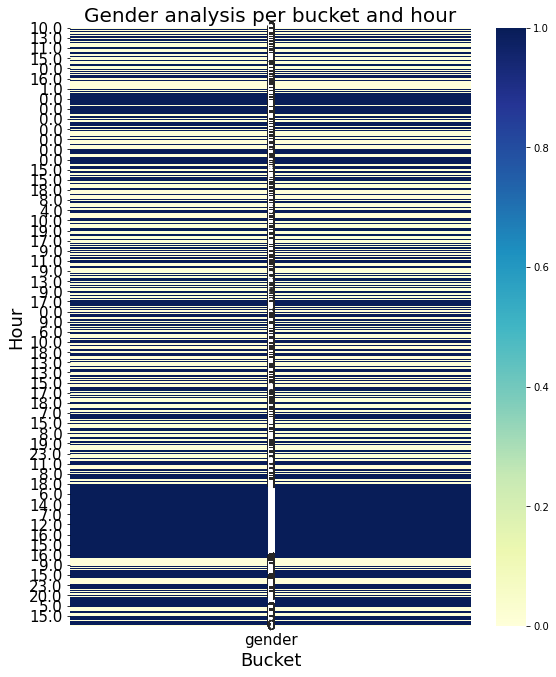

In [54]:
plot_pivot_table(frameNew)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
   <p><b>- 1) 2 из полученных MCC-кодов связаны с финансовыми институтами</b><br>
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)<br>
    <b>- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов</b><br>
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних<br>
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию.</p> 

**Результат есть, решение не очень хорошее**

In [31]:
# Type your code here
transactions['tr_day'].astype('int')

0           0
1           6
2           8
3          11
4          11
         ... 
999579     18
999580    206
999581     90
999582    104
999583    105
Name: tr_day, Length: 999584, dtype: int64

In [32]:
tr_mcc123 = transactions['mcc_code'].value_counts() > 60000

In [33]:
tr_mcc1234 = tr_mcc123.index.values

In [34]:
tr_mcc1234 = tr_mcc123.head()

In [35]:
tr_mcc1234 = tr_mcc1234.index.values

In [36]:
tr_mcc12345 = transactions[transactions.mcc_code.isin(tr_mcc1234)]

In [37]:
tr_mcc123456 = tr_mcc12345.groupby(['tr_day', 'mcc_code'])[['amount']].mean()

In [38]:
tr_unstack = tr_mcc123456.unstack()

In [39]:
tr_unstack

amount                                                          
mcc_code         4814           4829          5411           6010          6011
tr_day                                                                         
0        -5631.316489 -214754.866266 -15462.567344   90390.672987 -55388.115175
1        -6375.587685 -158317.573750 -17770.243543   57658.709639 -38938.920557
10       -5389.918248 -228132.640744 -11786.959640   86468.790485 -61714.964187
100      -4781.903545 -194239.654396 -19120.905404   37740.259740 -39384.263698
101      -4855.970763 -168552.888955 -12993.806543   76511.451009 -71570.902418
...               ...            ...           ...            ...           ...
95       -6011.389778  -95164.485222 -16356.643977   34125.577421 -61171.779236
96       -6170.333992 -300806.325346 -11947.709291  165642.031479 -61565.050328
97       -4466.734959 -194807.377683 -13448.300000   47729.581370 -45838.899178
98       -5547.525586 -192217.046461 -15145.675611   95705.710442 -99406.001923
99       -4309.617361 -131829.295859 -19178.533333   88828.474225 -65287.720000

[457 rows x 5 columns]

In [40]:
demo = tr_mcc_codes[tr_mcc_codes.mcc_code.isin(tr_mcc1234)]
demo

,mcc_code,mcc_description
20,4814,"Звонки с использованием телефонов, считывающих..."
22,4829,Денежные переводы
56,5411,"Бакалейные магазины, супермаркеты"
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...
